In [1]:
import numpy as np
import pandas as pd
import math
from scipy.io import arff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.decomposition import PCA
from scipy.stats import rankdata, norm, gaussian_kde
import matplotlib.pyplot as plt
from random import randrange

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
filename = "real_world_data/airline_dataset.csv"
data = pd.read_csv(filename)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Airline,Flight,Time,Length,Delay
0,0,b'CO',269.0,15.0,205.0,1
1,1,b'US',1558.0,15.0,222.0,1
2,2,b'AA',2400.0,20.0,165.0,1
3,3,b'AA',2466.0,20.0,195.0,1
4,4,b'AS',108.0,30.0,202.0,0


In [3]:
train = df.iloc[:179794,:]
test = df.iloc[179794:,:]

oe = OrdinalEncoder()

X_train_num = train.drop(columns=["Airline", "Delay", "Unnamed: 0"])
X_train_cat = train[["Airline"]]
X_train_cat = oe.fit_transform(X_train_cat)
X_train = np.concatenate([X_train_cat, X_train_num], axis=1)
X_test_num = test.drop(columns=["Airline", "Delay", "Unnamed: 0"])
X_test_cat = test[["Airline"]]
X_test_cat = oe.transform(X_test_cat)
X_test = np.concatenate([X_test_cat, X_test_num], axis=1)

y_train = train[["Delay"]]
y_test = test[["Delay"]]

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

(179794, 4)
(359589, 4)
(179794, 1)
(359589, 1)


,0,1,2,3
0,0.235294,0.034306,0.003499,0.312977
1,0.823529,0.199309,0.003499,0.338931
2,0.058824,0.307092,0.006998,0.251908
3,0.058824,0.315540,0.006998,0.297710
4,0.117647,0.013697,0.013996,0.308397


In [4]:
# Original hyperparameter optimization

# models = []

# k_range = range(1500, 2220, 3)

# k_scores = []

# for k in k_range:
#     model = KNeighborsClassifier(n_neighbors=k)
#     models.append(model)
#     score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5).mean()
#     print(k, score)
#     k_scores.append(score) 

# plt.plot(k_range, k_scores)
# plt.show()

# model_knn = KNeighborsClassifier(n_neighbors=27)
# np.mean(cross_val_score(model_knn, X_train, y_train.values.ravel(), cv=5))

In [5]:
# Cross-validation 20 times with randomly selected sequential leave-17k-out to measure the expected accuracy

cross_val_scores = []

for n in range(20):
    test_start = randrange(0, 179794 - 17000)
    test_end = test_start + 17000
    print(test_start, test_end)
    
    cross_val_y_test = y_train.iloc[test_start:test_end,:]
    cross_val_y_train_1 = y_train.iloc[:test_start,:]
    cross_val_y_train_2 = y_train.iloc[test_end:,:]
    cross_val_y_train = np.concatenate([cross_val_y_train_1, cross_val_y_train_2], axis=0)
    
    cross_val_X_test = X_train.iloc[test_start:test_end,:]
    cross_val_X_train_1 = X_train.iloc[:test_start,:]
    cross_val_X_train_2 = X_train.iloc[test_end:,:]
    cross_val_X_train = np.concatenate([cross_val_X_train_1, cross_val_X_train_2], axis=0)
    
    cross_val_model = KNeighborsClassifier(n_neighbors=2066)
    cross_val_model.fit(cross_val_X_train, cross_val_y_train.ravel())
    cval_score = cross_val_model.score(cross_val_X_test, cross_val_y_test)
    print(cval_score, '\n')
    cross_val_scores.append(cval_score)

np.mean(cross_val_scores)
np.std(cross_val_scores)

55812 72812
0.6998235294117647 

26771 43771
0.7162941176470589 

92234 109234
0.6764117647058824 

9455 26455
0.6645294117647059 

8689 25689
0.659 

2581 19581
0.6024705882352941 

23427 40427
0.7110588235294117 

33469 50469
0.7235294117647059 

57867 74867
0.6885294117647058 

93081 110081
0.6807058823529412 

133890 150890
0.6908823529411765 

68086 85086
0.653 

111425 128425
0.7214117647058823 

108881 125881
0.7221176470588235 

112418 129418
0.7245882352941176 

156016 173016
0.672235294117647 

117992 134992
0.713764705882353 

150547 167547
0.656235294117647 

37013 54013
0.7111764705882353 

158268 175268
0.6656470588235294 



0.687670588235294

In [6]:
X_test_batches = []
y_test_batches = []

i = 0
while i < len(X_test):
    new_i = i + 17000
    if new_i > len(X_test):
        new_i = len(X_test)
    X_test_batches.append(X_test[i: new_i])
    y_test_batches.append(y_test[i: new_i])
    i = new_i

print(len(X_test_batches))
print(X_test_batches[0].shape)
print(y_test_batches[0].shape)
print(X_test_batches[-1].shape)
print(y_test_batches[-1].shape)

22
(17000, 4)
(17000, 1)
(2589, 4)
(2589, 1)


In [7]:
# models = [
#     model_knn,
#     model_rf,
#     model_svm,
#     model_pc,
#     model_lr
# ]

accs = []

# # 2066-1500 /3 ~= 189 (choose K~=2066)
# for i in range(1):
#     model = models[189]

#     model.fit(X_train, y_train.values.ravel())

#     accs.append([])

#     for batch in range(len(X_test_batches)):
#         accs[i].append(model.score(X_test_batches[batch], y_test_batches[batch]))

#     print(accs[i])

model_knn = KNeighborsClassifier(n_neighbors=2066)
model_knn.fit(X_train, y_train.values.ravel())
for batch in range(len(X_test_batches)):
    batch_score = model_knn.score(X_test_batches[batch], y_test_batches[batch])
    print('\n', batch_score)
    if batch_score < np.mean(cross_val_scores) - np.std(cross_val_scores):
        print("drift in batch", batch + 1)
    accs.append(batch_score)


 0.6605294117647059

 0.5252941176470588
drift in batch 2

 0.5741764705882353
drift in batch 3

 0.6344117647058823
drift in batch 4

 0.6090588235294118
drift in batch 5

 0.5358823529411765
drift in batch 6

 0.5460588235294118
drift in batch 7

 0.5345882352941177
drift in batch 8

 0.5927058823529412
drift in batch 9

 0.5494117647058824
drift in batch 10

 0.5199411764705882
drift in batch 11

 0.5101176470588236
drift in batch 12

 0.5898823529411765
drift in batch 13

 0.6335294117647059
drift in batch 14

 0.6171764705882353
drift in batch 15

 0.5421764705882353
drift in batch 16

 0.5918823529411765
drift in batch 17

 0.5276470588235294
drift in batch 18

 0.49211764705882355
drift in batch 19

 0.5086470588235295
drift in batch 20

 0.537235294117647
drift in batch 21

 0.5399768250289687
drift in batch 22


0.6564955472025864


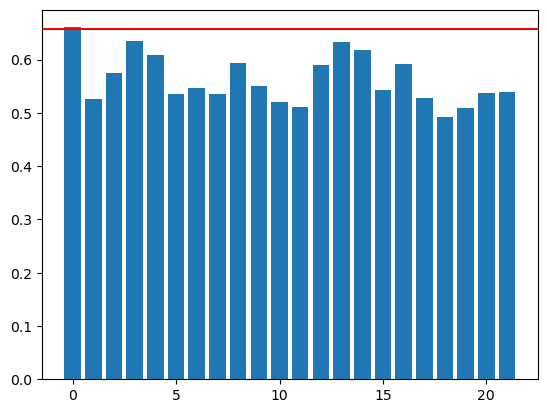

In [8]:
threshold = np.mean(cross_val_scores) - np.std(cross_val_scores)
print(threshold)
plt.bar(range(0, len(X_test_batches)), accs)
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()